# 1. Титульная информация
Участники:

Дубовик Никита Спартакович, ИСУ 465809, поток J3110

Таряник Антон Александрович, ИСУ 467677, поток J3111

Мавров Артëм Николаевич, ИСУ 466574, поток J3113

# 2. Ход выполнения работы


1.   Выбор параметров:
  *   a = 5
  *   r = [1, 2, 3, 4, 5]
2.   Расчет истинной вероятности:
  *   Для квадрата со стороной $2a = 10$ и круга радиуса $r$:
\begin{equation}
    p(r) = \frac{\text{Площадь круга}}{\text{Площадь квадрата}} = \frac{\pi r^2}{(2a)^2} = \frac{\pi r^2}{100}
\end{equation}
3.   Генерация точек:
  *   С помощью ```numpy.random.Generator.uniform``` сгенерировано $10000$ точек в квадрате
4.   Оценка вероятности:
  *   Вычислена доля точек $\widehat{p}(n)
$, попавших в круг.
5.   Анализ ошибки:
  *   $\varepsilon(n) = |\hat{p}(n) - p|$
6.   Определение $N(\varepsilon)$:
  *  Для $\varepsilon_i \in \{0.1, 0.01, 0.001, 0.0001, 0.00001\}$ найдено минимальное $N$, при котором $\varepsilon(n) \leq \varepsilon_i$.









# 3. Основная часть

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Параметры
a: int = 5
r_list: list[int] = [1, 2, 3, 4, 5]  # Значения радиусов
num_points: int = 10000 # Максимальное количество точек
epsilon_list: list[float] = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]  # Целевые значения точности

In [ ]:
# Генерация случайных точек
rng = np.random.default_rng(seed=50)
points: np.ndarray = rng.uniform(low=-a, high=a, size=(num_points, 2))

In [ ]:
# Расчет истинных вероятностей
true_p: dict = {r: (np.pi * r ** 2) / (2 * a) ** 2 for r in r_list}

In [ ]:
# Настраиваем темы для графиков
sns.set_theme(style="whitegrid", palette="bright")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

In [ ]:
def compute_epsilon_and_p(points: np.ndarray, r: float, true_p: float, n: np.ndarray) -> tuple:
    """Вычисляет оценку вероятности и ошибку для заданного радиуса."""
    # Определение принадлежности точек кругу для каждого r
    in_circle = (points[:, 0]**2 + points[:, 1]**2) <= r**2
    p = np.cumsum(in_circle.astype(int)) / n
    epsilon = np.abs(p - true_p)

    return p, epsilon


def create_probability_plot(n: np.ndarray, p: np.ndarray, r: float, true_p: float) -> None:
    """Создает график оценки вероятности."""
    plt.figure(figsize=(16, 8))
    sns.lineplot(
        x=n,
        y=p,
        color='#007bb6',
        alpha=0.9,
        label='Оценка $\hat{p}(n)$'
    )
    plt.axhline(
        y=true_p,
        color='#ff0000',
        linestyle='--',
        linewidth=2,
        label='Истинная вероятность $p$'
    )
    plt.title(f'Оценка вероятности для r = {r}', pad=15)
    plt.xlabel('Количество точек $n$')
    plt.ylabel('Вероятность')
    plt.legend()
    plt.tight_layout()
    plt.show()


def create_error_plot(n: np.ndarray, epsilon: np.ndarray, r: float) -> None:
    """Создает график зависимости ошибки от количества точек."""
    plt.figure(figsize=(16, 8))
    sns.lineplot(
        x=n,
        y=epsilon,
        color='#008800',
        alpha=0.9,
        label='Ошибка $\epsilon(n)$'
    )
    plt.title(f'Зависимость ошибки от n для r = {r}', pad=15)
    plt.xlabel('Количество точек $n$')
    plt.ylabel('Абсолютная ошибка')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()

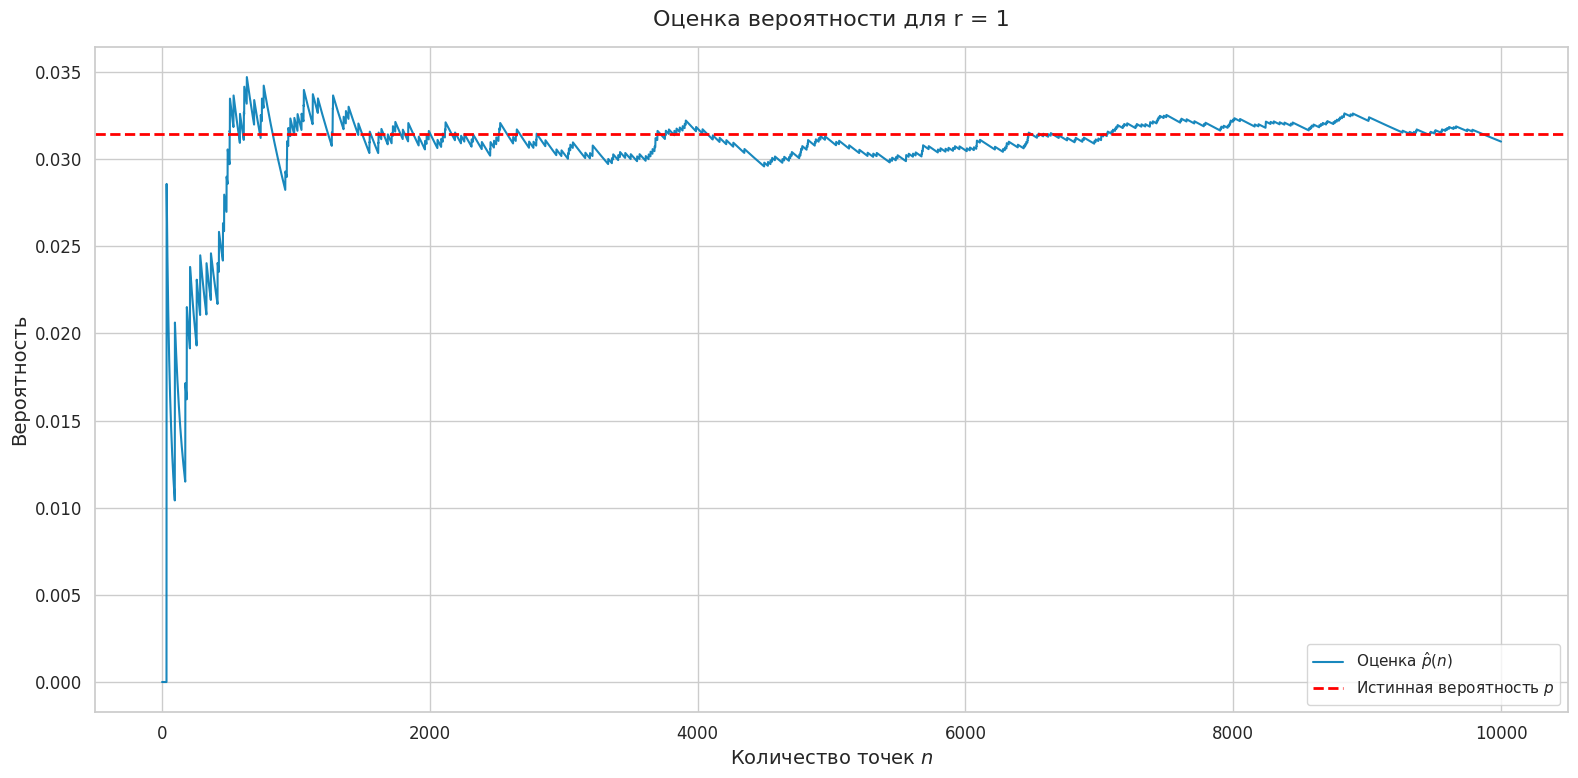

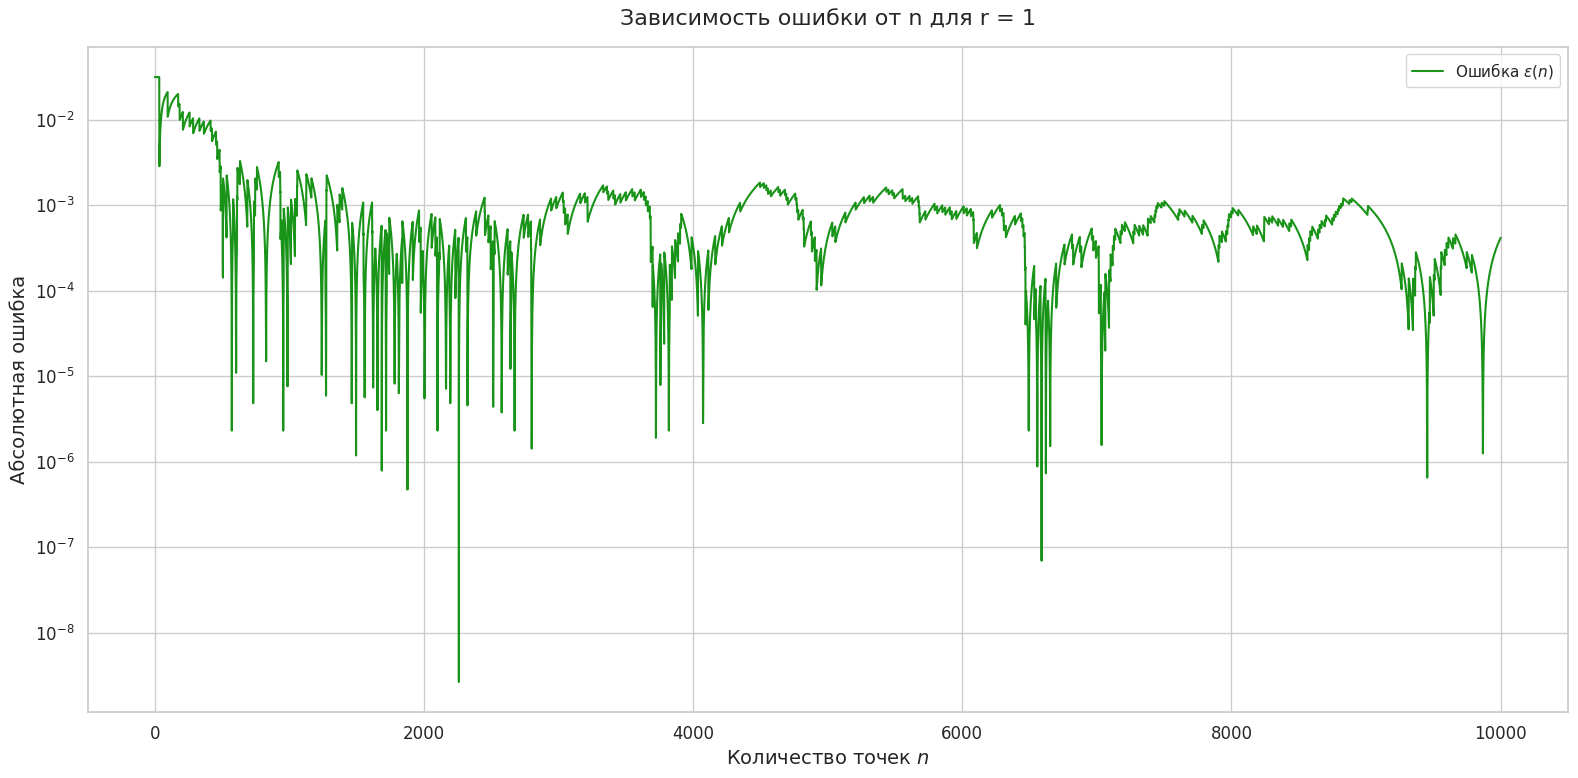

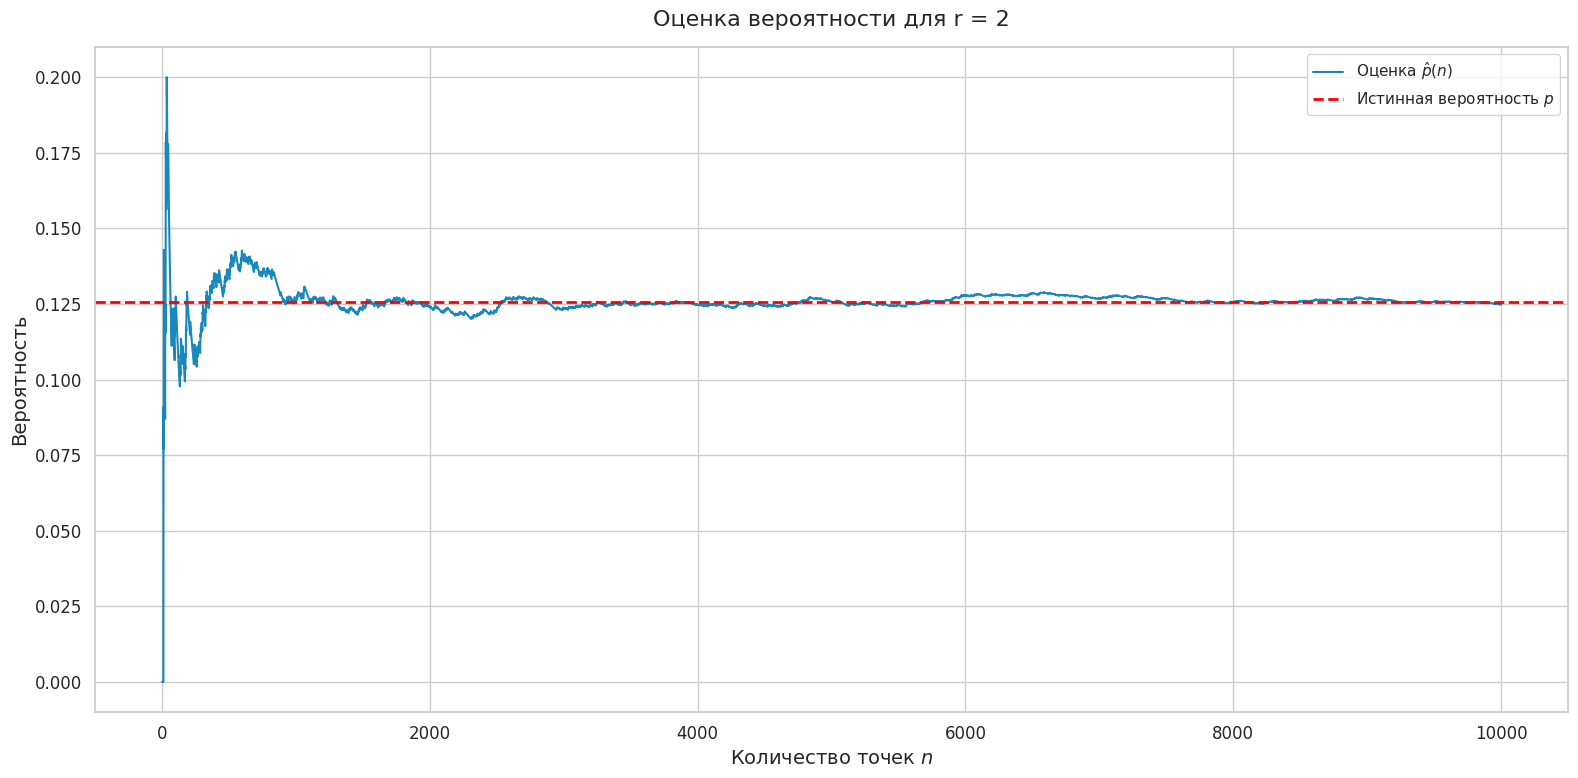

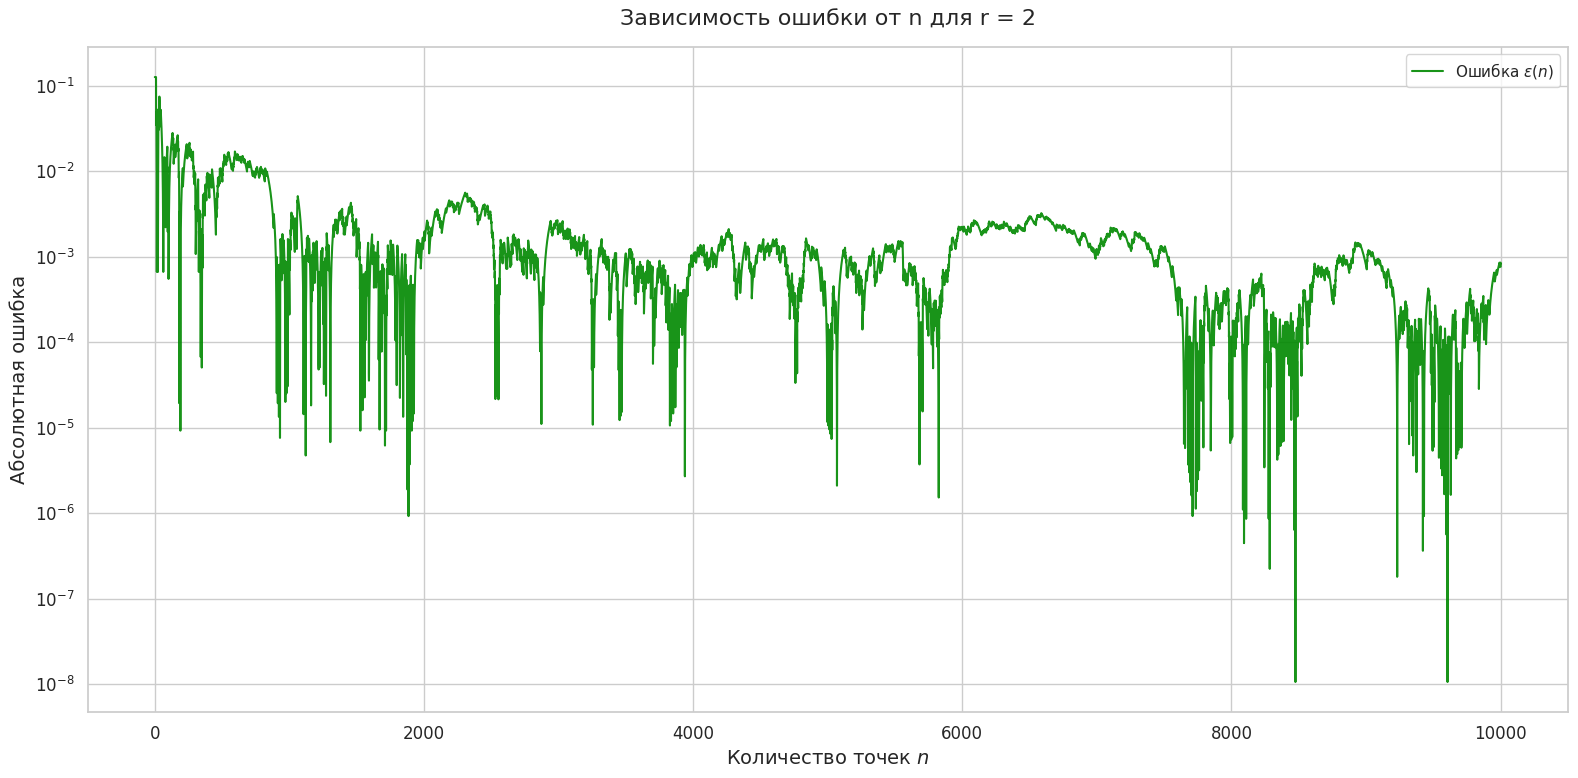

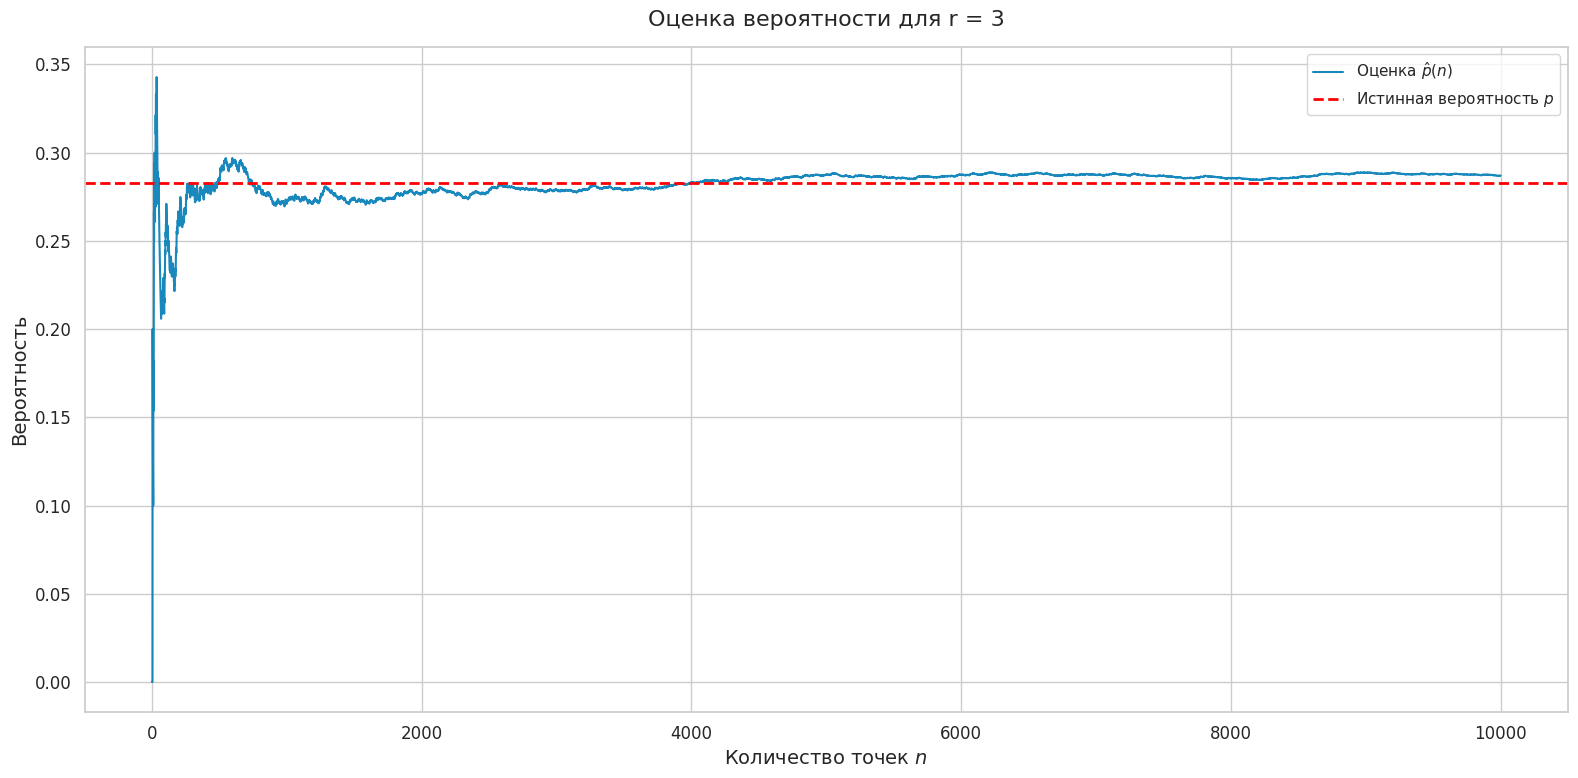

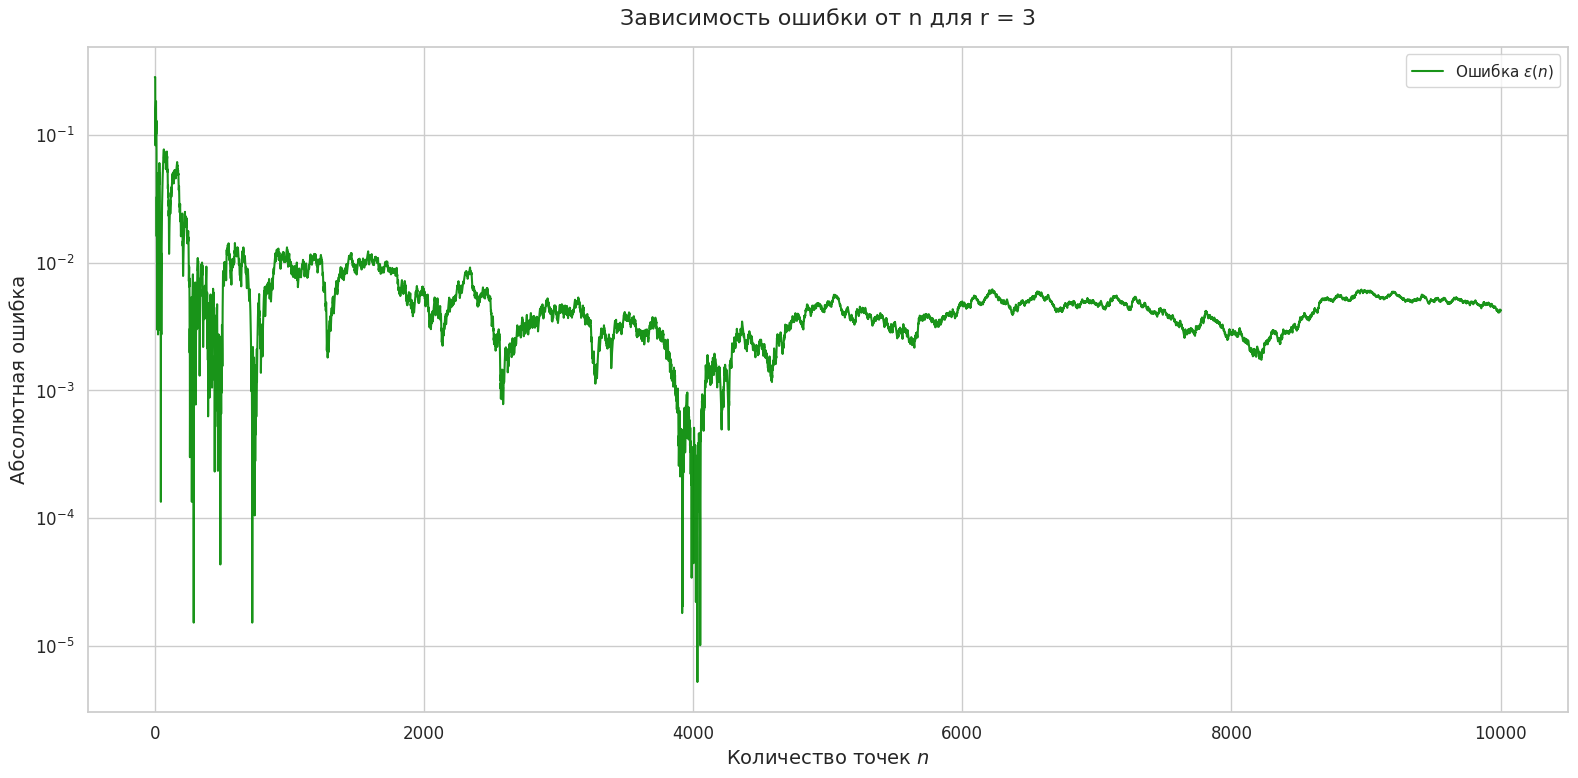

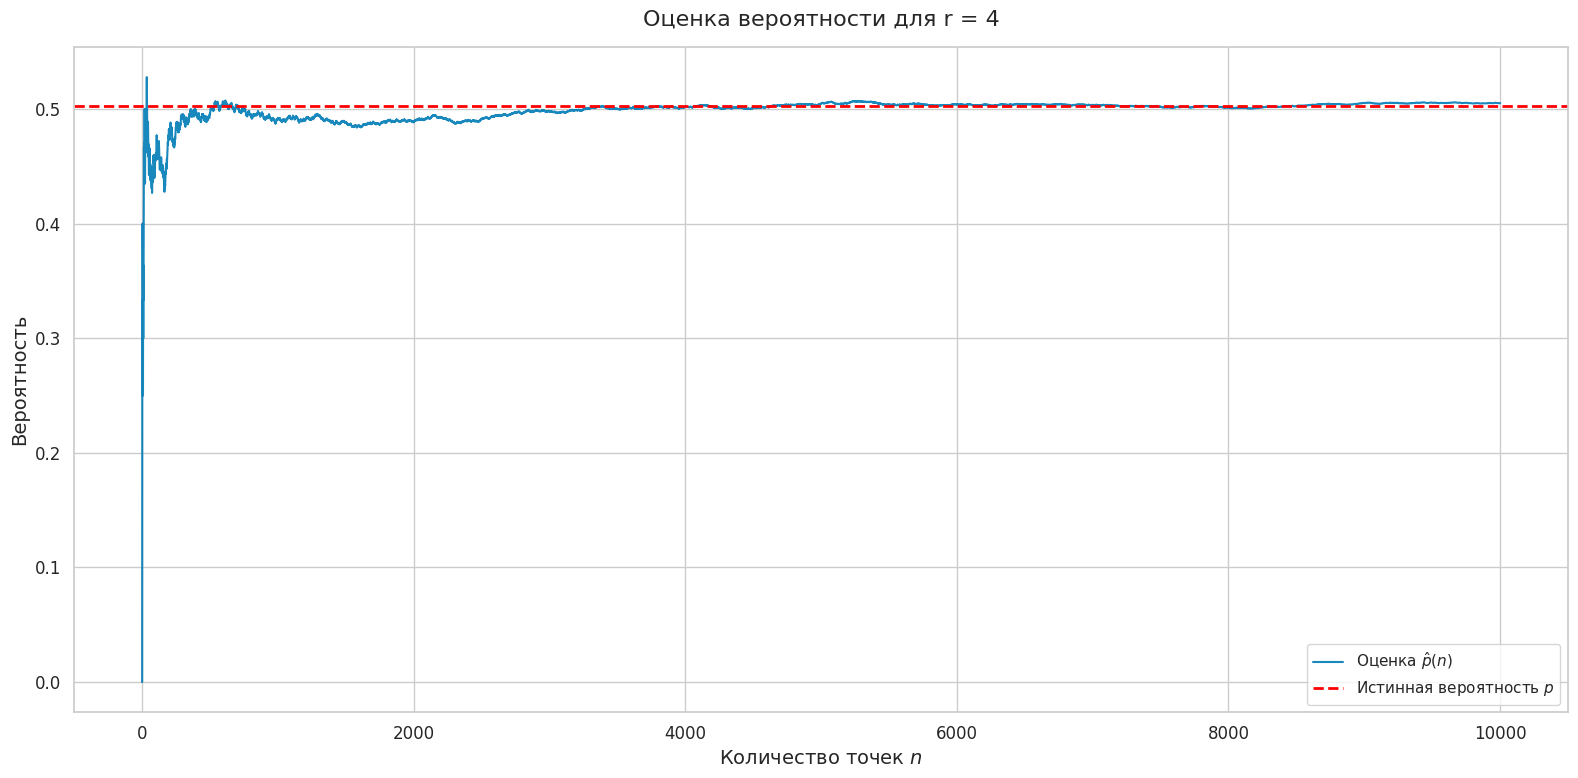

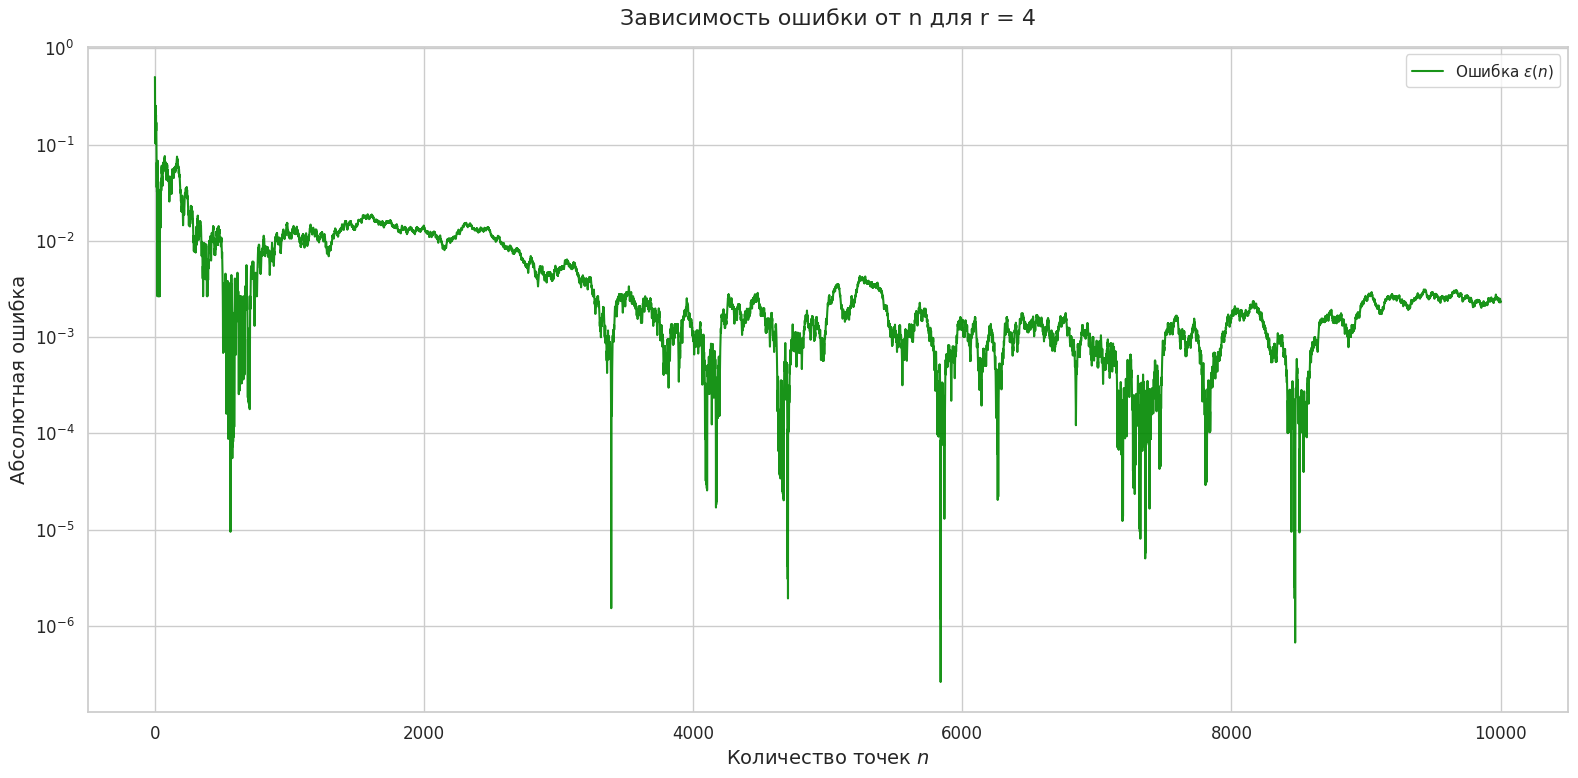

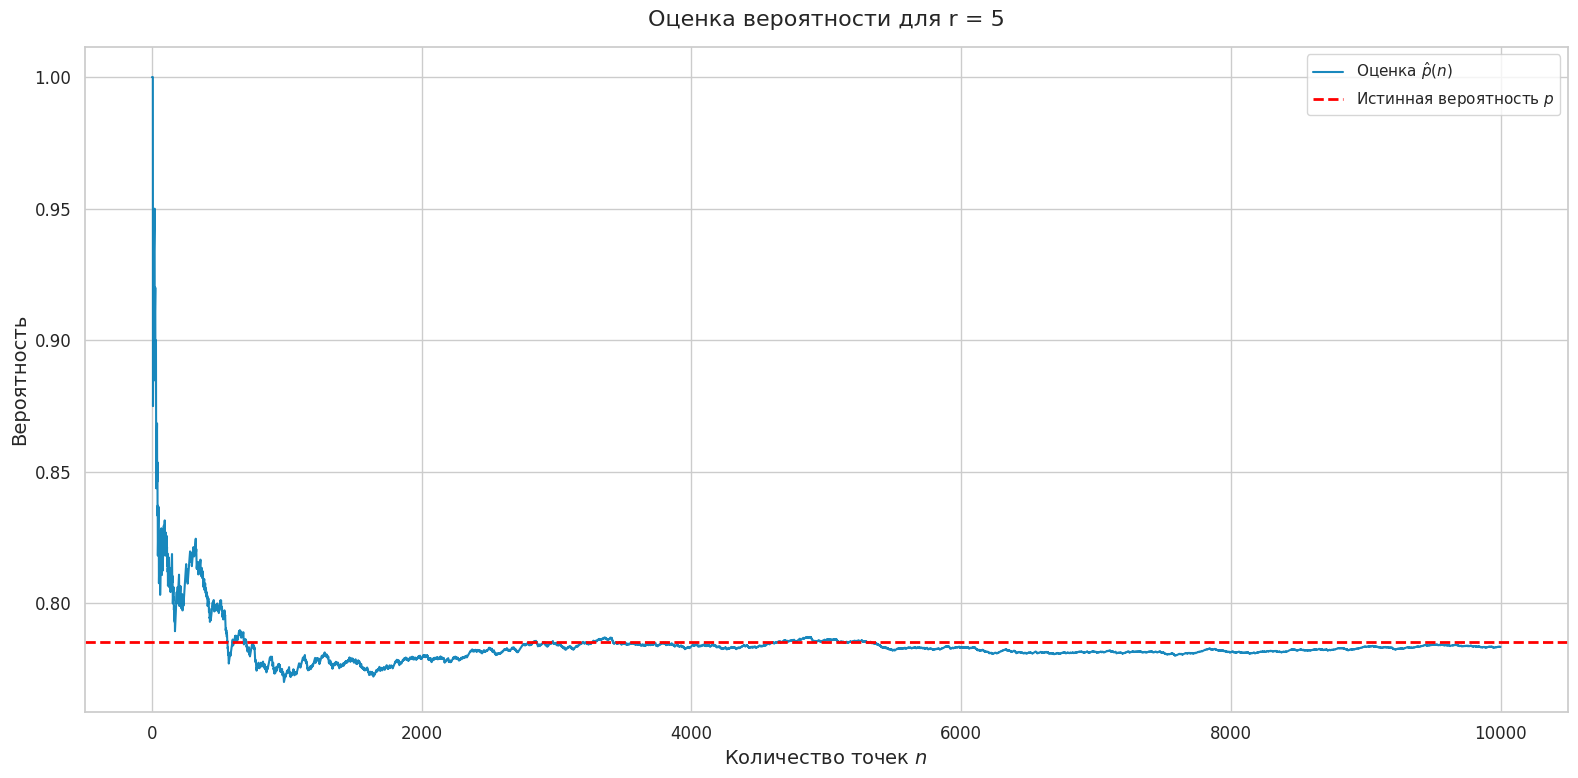

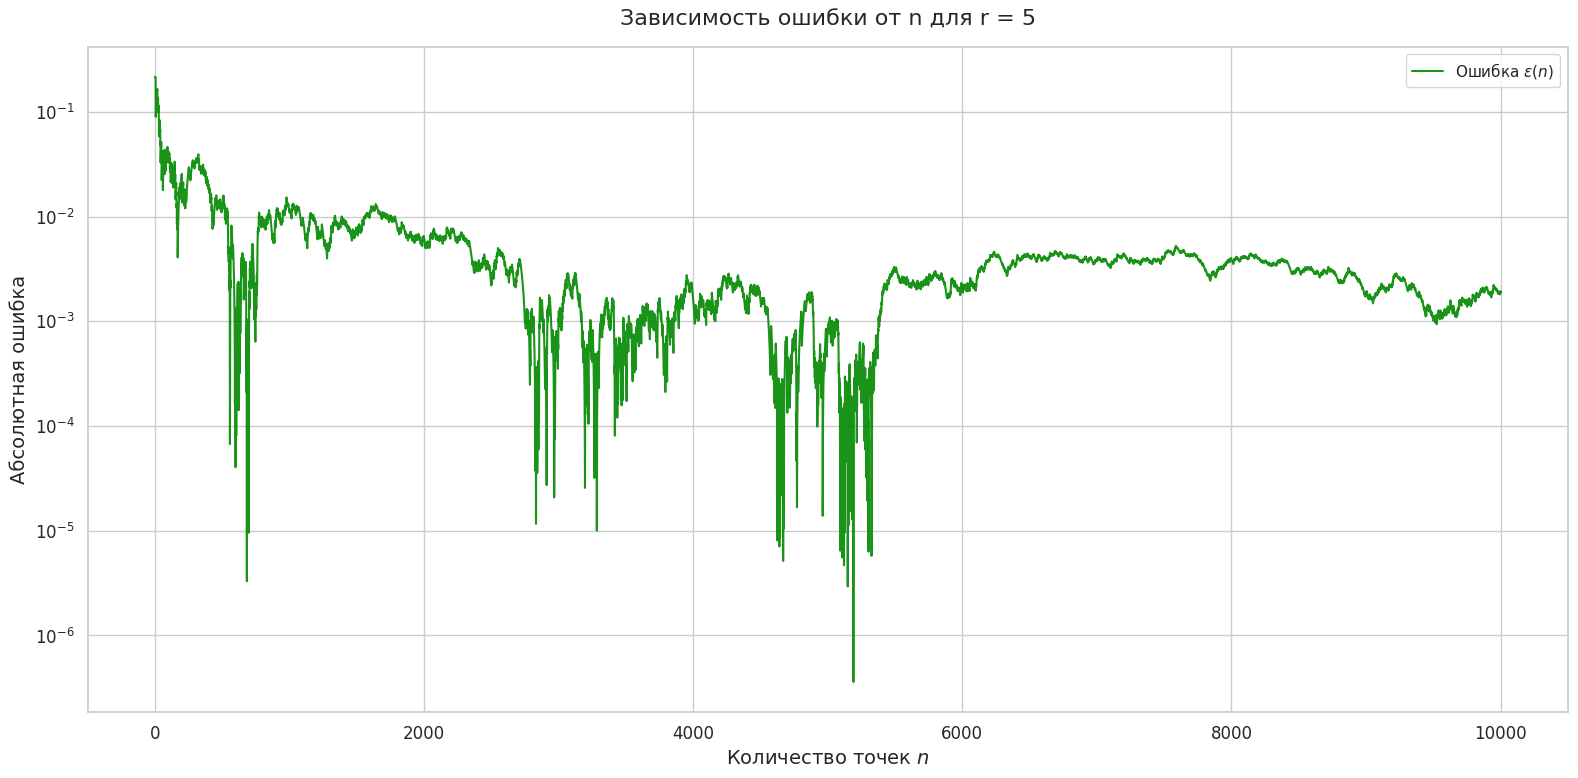

In [ ]:
# Вычисление N(ε) для каждого r
n_values: dict = {r: {} for r in r_list}

for r in r_list:
    n = np.arange(1, num_points + 1)
    # Оцениваем вероятности и ошибку
    p_hat, epsilon = compute_epsilon_and_p(points, r, true_p[r], n)

    for eps in epsilon_list:
        below_eps = np.where(epsilon <= eps)[0]
        if below_eps.size > 0:
            n_values[r][eps] = below_eps[0] + 1
        else:
            n_values[r][eps] = None

    # Визуализация результатов
    create_probability_plot(n, p_hat, r, true_p[r])
    create_error_plot(n, epsilon, r)

Исходя из графиков можно сделать вывод, что с ростом количества точек вычисляемая геометрическая вероятность приближается к истинной, а абсолютная ошибка стабилизируется.

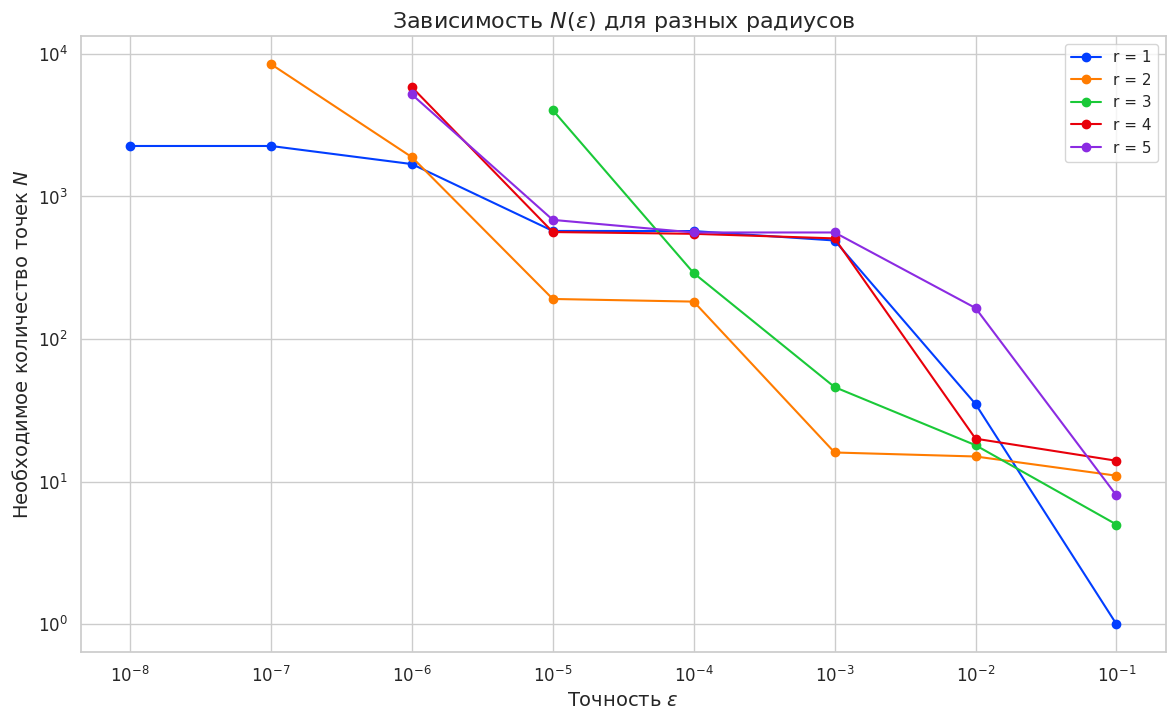

In [ ]:
# Построение графиков N(ε)
plt.figure(figsize=(14, 8))
for r in r_list:
    eps_values = []
    N_values = []
    for eps in epsilon_list:
        if n_values[r][eps] is not None:
            eps_values.append(eps)
            N_values.append(n_values[r][eps])
    plt.plot(eps_values, N_values, 'o-', label=f'r = {r}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Точность $\epsilon$')
plt.ylabel('Необходимое количество точек $N$')
plt.title('Зависимость $N(\epsilon)$ для разных радиусов')
plt.legend()
plt.grid(True)
plt.show()

# Вывод

В ходе данной лабораторной работы был изучен метод "Монте-Карло", который связывает частотную и геометрическую вероятности. Основная идея подхода заключается в генерации множества точек (N) на плоскости. В контексте данной лабораторной работы отношение площади круга к площади квадрата - теоретическая геометрическая вероятность, а отношение количества точек внутри круга к всем точкам на плоскости - частотная веросятность (не точная). Построив графики зависимости частотной вероятности от количества точек, мы убедились, что вместе с ростом N частотная вероятность становится очень приближенной к теоретической вероятности, что и показывает корректность подхода